# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

Here I load all the libraries and import my functions to use. 

In [1]:
import pandas as pd
import numpy as np
from math import factorial
from scipy import stats as st
from matplotlib import pyplot as plt

## Load data

In [2]:
calls= pd.read_csv('/datasets/megaline_calls.csv')

In [3]:
internet= pd.read_csv('/datasets/megaline_internet.csv')

In [4]:
messages= pd.read_csv('/datasets/megaline_messages.csv')

In [5]:
plans= pd.read_csv('/datasets/megaline_plans.csv')

In [6]:
users= pd.read_csv('/datasets/megaline_users.csv')

Above I read all the CSV files and loaded them in.

## Prepare the data

## Plans

In [7]:
plans.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
plans.sample(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
1,1000,30720,3000,70,7,0.01,0.01,ultimate
0,50,15360,500,20,10,0.03,0.03,surf


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Printed the general/summary information about the plans DataFrame.
Printed a sample of data for plans.
Looking at the samples and datatypes so it all looks good for further reading.

## Fix data

[Fix obvious issues with the data given the initial observations.]

In [9]:
plans.duplicated().sum()

0

In [10]:
plans.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

Checked for duplicates or missing data.

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

## Users

In [11]:
users.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
users.sample(5)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
136,1136,Jasper,Caldwell,25,"Knoxville, TN MSA",2018-10-14,surf,NaN
352,1352,Gavin,Galloway,48,"Seattle-Tacoma-Bellevue, WA MSA",2018-09-08,ultimate,NaN
330,1330,Tobi,Kinney,48,"Las Vegas-Henderson-Paradise, NV MSA",2018-11-06,ultimate,NaN
101,1101,Sage,Conley,27,"Washington-Arlington-Alexandria, DC-VA-MD-WV MSA",2018-02-08,surf,NaN
302,1302,Leonila,Morris,62,"Rochester, NY MSA",2018-01-21,surf,NaN


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Printed the general/summary information about the users' DataFrame.
Printed a sample of data for users.
looking at the data printouts it looks as though the reg_date and chur_date columns can be changed to datetime type.

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [13]:
users.duplicated().sum()

0

In [14]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Checked for duplicates and missing data.

### Enrich Data

In [15]:
users['reg_date']= pd.to_datetime(users['reg_date'], format= '%Y-%m-%d')

In [16]:
users['churn_date']=pd.to_datetime(users['churn_date'], format= '%Y-%m-%d')

In [17]:
users.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


Changed the column type for the columns with dates to datetime.

## Calls

In [18]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [19]:
calls.sample(5)

,id,user_id,call_date,duration
130713,1470_162,1470,2018-08-22,12.91
15148,1061_90,1061,2018-07-31,1.78
115297,1404_91,1404,2018-10-09,6.91
123923,1437_801,1437,2018-12-26,5.64
70546,1251_557,1251,2018-06-30,23.44


Printed the general/summary information about the calls' DataFrame.
Printed a sample of data for calls.
Call dates can be changed to tatetime data type.

### Fix data

In [20]:
calls.duplicated().sum()

0

In [21]:
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

Checked for duplicates and missing data.

### Enrich data

In [22]:
calls['call_date']=pd.to_datetime(calls['call_date'], format= '%Y-%m-%d')

In [23]:
calls['duration']=calls['duration'].apply(np.ceil).astype(int)
calls

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,9
1,1000_145,1000,2018-12-27,14
2,1000_247,1000,2018-12-27,15
3,1000_309,1000,2018-12-28,6
4,1000_380,1000,2018-12-30,5
...,...,...,...,...
137730,1499_199,1499,2018-11-21,9
137731,1499_200,1499,2018-10-20,11
137732,1499_201,1499,2018-09-21,9
137733,1499_202,1499,2018-10-10,1


Changed the column type for the columns with dates to datetime. Rounded the calls up to the next integer and changed format type to 'int' format.

## Messages

In [24]:
messages.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [25]:
messages.sample(5)

,id,user_id,message_date
8115,1061_121,1061,2018-12-04
70523,1458_252,1458,2018-10-23
3040,1033_53,1033,2018-11-20
27342,1167_299,1167,2018-06-10
64171,1408_296,1408,2018-02-25


Printed the general/summary information about the messages' DataFrame.
Printed a sample of data for messages.
The message_date column can be converted to datetime type.

### Fix data

In [26]:
messages.duplicated().sum()

0

In [27]:
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

Checked for duplicates and missing data.

### Enrich data

In [28]:
messages['message_date']=pd.to_datetime(messages['message_date'], format= '%Y-%m-%d')

Changed the column type for the columns with dates to datetime.

## Internet

In [29]:
internet.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [30]:
internet.sample(5)

,id,user_id,session_date,mb_used
40879,1183_70,1183,2018-12-24,320.04
25114,1117_47,1117,2018-10-04,0.00
50712,1226_193,1226,2018-10-02,669.50
43597,1194_15,1194,2018-10-09,558.26
4020,1022_431,1022,2018-11-14,135.56


Printed the general/summary information about the internet DataFrame.
Printed a sample of data for the internet traffic.
The session_date column can be converted to datetime data type.

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [31]:
internet.duplicated().sum()

0

In [32]:
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

Checked for duplicates and missing data.

### Enrich data

In [33]:
internet['session_date']=pd.to_datetime(internet['session_date'], format= '%Y-%m-%d')
internet.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


Changed the column type for the columns with dates to datetime.

## Study plan conditions

In [34]:
# Print out the plan conditions and make sure they are clear for you
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

In [35]:
# Calculate the number of calls made by each user per month. Save the result.
# Calculate the amount of minutes spent by each user per month. Save the result.

calls['month']= calls['call_date'].dt.month
month_calls= calls.groupby(['user_id', 'month']).agg({'call_date': 'count','duration': 'sum'})

month_calls

call_date  duration
user_id month                     
1000    12            16       124
1001    8             27       182
        9             49       315
        10            65       393
        11            64       426
...                  ...       ...
1498    12            39       339
1499    9             41       346
        10            53       385
        11            45       308
        12            65       496

[2258 rows x 2 columns]

In [36]:
# Calculate the number of messages sent by each user per month. Save the result.
messages['month']=messages['message_date'].dt.month
messages_month= messages.groupby(['user_id', 'month']).agg({'message_date': 'count'})
messages_month

message_date
user_id month              
1000    12               11
1001    8                30
        9                44
        10               53
        11               36
...                     ...
1496    9                21
        10               18
        11               13
        12               11
1497    12               50

[1806 rows x 1 columns]

In [37]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet['month']=internet['session_date'].dt.month
internet_month= internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})
internet_month

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

Since the data is clean, i aggregateed the data per user per period in order to have just one record per user per period. I saved it under "merged" to make it easier the do further analysis on it. I Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.

In [38]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged= pd.concat([month_calls, messages_month, internet_month], axis=1)
merged=merged.fillna(0)
merged.reset_index(inplace=True)
merged

,user_id,month,call_date,duration,message_date,mb_used
0,1000,12,16.0,124.0,11.0,1901.47
1,1001,8,27.0,182.0,30.0,6919.15
2,1001,9,49.0,315.0,44.0,13314.82
3,1001,10,65.0,393.0,53.0,22330.49
4,1001,11,64.0,426.0,36.0,18504.30
...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23137.69
2289,1499,9,41.0,346.0,0.0,12984.76
2290,1499,10,53.0,385.0,0.0,19492.43
2291,1499,11,45.0,308.0,0.0,16813.83


In [39]:
# Add the plan information
merged= merged.merge(users,on='user_id',how='inner')
merged=merged.merge(plans,left_on='plan',right_on='plan_name',how='inner')
merged

,user_id,month,call_date,duration,message_date,mb_used,first_name,last_name,age,city,...,plan,churn_date,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,11,2.0,10.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1006,12,9.0,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,ultimate,2018-12-18,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1008,10,71.0,476.0,21.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1008,11,63.0,446.0,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,ultimate,NaT,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,39.0,339.0,0.0,23137.69,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2289,1499,9,41.0,346.0,0.0,12984.76,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2290,1499,10,53.0,385.0,0.0,19492.43,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf
2291,1499,11,45.0,308.0,0.0,16813.83,Shena,Dickson,37,"Orlando-Kissimmee-Sanford, FL MSA",...,surf,NaT,50,15360,500,20,10,0.03,0.03,surf


Calculateed the monthly revenue from each user by subtracting the free package limit from the total number of calls, messages, and data then multiplied the result by eah plan value. I rounded all negative values to 0. I then added the monthly charge depending on the calling plan.

In [40]:
# Calculate the monthly revenue for each user
merged['messages_diff']=merged['message_date']-merged['messages_included']
merged['minutes_diff']=merged['duration']-merged['minutes_included']
merged['internet_diff']=merged['mb_used']-merged['mb_per_month_included']
merged['messages_diff']=merged['messages_diff'].apply(lambda x: x if x>=0 else 0)
merged['minutes_diff']=merged['minutes_diff'].apply(lambda x: x if x>=0 else 0)
merged['internet_diff']=merged['internet_diff'].apply(lambda x: x if x>=0 else 0)
merged['add_message_rev']=merged['messages_diff']*merged['usd_per_message']
merged['add_call_rev']=merged['minutes_diff']*merged['usd_per_minute']
merged['add_internet_rev']=np.ceil(merged['internet_diff']/1024)*merged['usd_per_gb']
merged['month_total']= merged['add_message_rev']+merged['add_call_rev']+merged['add_internet_rev']+merged['usd_monthly_pay']
merged.head()


,user_id,month,call_date,duration,message_date,mb_used,first_name,last_name,age,city,...,usd_per_message,usd_per_minute,plan_name,messages_diff,minutes_diff,internet_diff,add_message_rev,add_call_rev,add_internet_rev,month_total
0,1000,12,16.0,124.0,11.0,1901.47,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",...,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,0.0,0.0,70.0
1,1006,11,2.0,10.0,15.0,2068.37,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,0.0,0.0,70.0
2,1006,12,9.0,59.0,139.0,32118.82,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",...,0.01,0.01,ultimate,0.0,0.0,1398.82,0.0,0.0,14.0,84.0
3,1008,10,71.0,476.0,21.0,17106.99,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,0.0,0.0,70.0
4,1008,11,63.0,446.0,37.0,23676.72,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",...,0.01,0.01,ultimate,0.0,0.0,0.00,0.0,0.0,0.0,70.0


## Study user behaviour

Calculateed some useful descriptive statistics for the aggregated and merged data, which reveals an overall picture of the data. Below I drew useful plots to help the understanding of the diffrences between the two plans. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots are calculated on a per-plan basis.

In [41]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                2293 non-null   int64         
 1   month                  2293 non-null   int64         
 2   call_date              2293 non-null   float64       
 3   duration               2293 non-null   float64       
 4   message_date           2293 non-null   float64       
 5   mb_used                2293 non-null   float64       
 6   first_name             2293 non-null   object        
 7   last_name              2293 non-null   object        
 8   age                    2293 non-null   int64         
 9   city                   2293 non-null   object        
 10  reg_date               2293 non-null   datetime64[ns]
 11  plan                   2293 non-null   object        
 12  churn_date             158 non-null    datetime64[ns]
 13  mes

In [42]:
merged.columns

Index(['user_id', 'month', 'call_date', 'duration', 'message_date', 'mb_used',
       'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'messages_diff', 'minutes_diff',
       'internet_diff', 'add_message_rev', 'add_call_rev', 'add_internet_rev',
       'month_total'],
      dtype='object')

### Calls

<AxesSubplot:title={'center':'Plan average minutes per month per plan'}, xlabel='Months', ylabel='Minutes'>

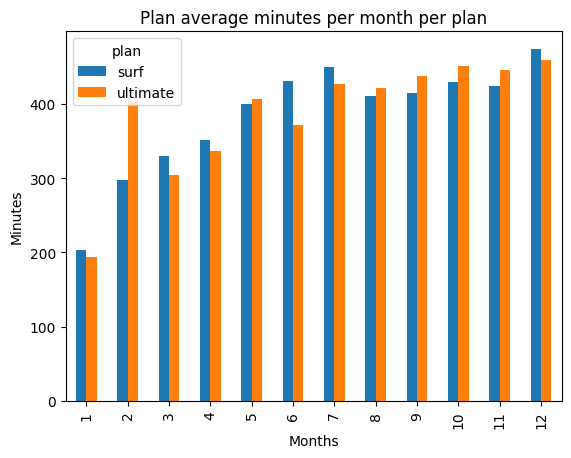

In [43]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
avg_duration=merged.groupby(['plan','month'])['duration'].mean().unstack(level=0)
avg_duration.plot(kind='bar',
                  stacked= False ,
                  xlabel= 'Months', 
                  ylabel= 'Minutes',
                  title= 'Plan average minutes per month per plan',
                  legend='Plan')


Assuming 1 is January and 12 is December, the average duration of phone calls generally increased as the year progressed, starting the year withh ~200min and ending the year with over 400min. 

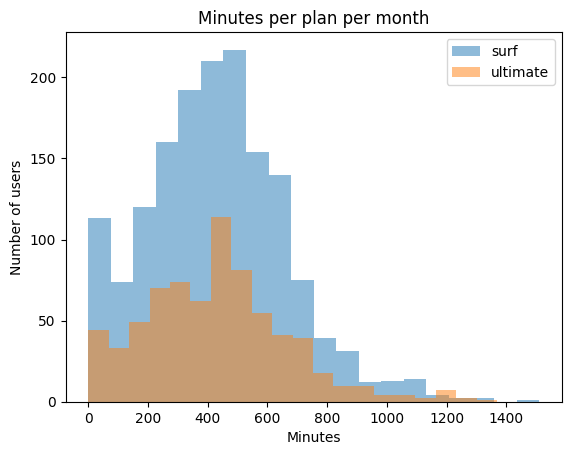

<Figure size 700x700 with 0 Axes>

In [44]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
surf=merged[merged['plan']=='surf']['duration']
ultimate= merged[merged['plan']== 'ultimate']['duration']
plt.hist(surf,bins=20,alpha=.5,label= 'surf')
plt.hist(ultimate,bins=20,alpha=.5,label='ultimate')
plt.xlabel('Minutes')
plt.ylabel('Number of users')
plt.title('Minutes per plan per month')
plt.legend()
plt.figure(figsize=(7,7))
plt.show()

Above is a histogram with the total number of minutes per plan. Since there are less ultimate users the histogram is less than the surf members one. 

In [45]:
# Calculate the mean and the variance of the monthly call duration
mean_surf= merged[merged['plan']=='surf']['duration'].mean()
mean_ultimate= merged[merged['plan']=='ultimate']['duration'].mean()
var_surf=merged[merged['plan']=='surf']['duration'].var()
var_ultimate=merged[merged['plan']=='ultimate']['duration'].var()

print(f'The mean for the surf plan is: {mean_surf}')
print(f'The mean for the ultimat plan is: {mean_ultimate}')
print(f'The variance for the surf plan is: {var_surf}')
print(f'The variance for the ultimate plan is: {var_ultimate}')

The mean for the surf plan is: 428.7495232040687
The mean for the ultimat plan is: 430.45
The variance for the surf plan is: 54968.27946065038
The variance for the ultimate plan is: 57844.46481223922


Calculated the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls. The mean amount for both the plans are a bit over $400 with the ultimate plan bring in a few dollars more on average.

Text(0.5, 1.0, 'Distribution of monthly calls')

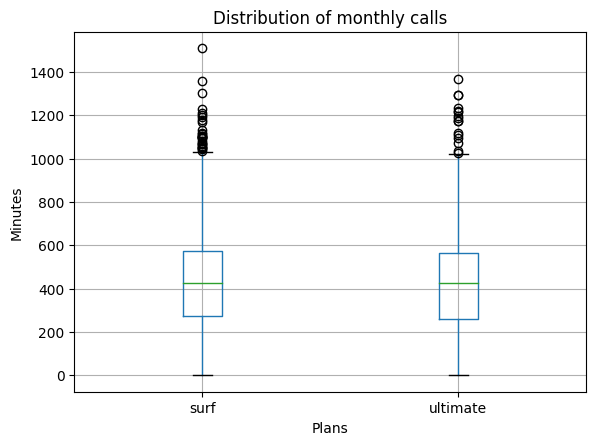

In [46]:
# Plot a boxplot to visualize the distribution of the monthly call duration
merged.boxplot(column='duration', by='plan')
plt.suptitle('')
plt.xlabel('Plans')
plt.ylabel('Minutes')
plt.title('Distribution of monthly calls')


In terms of calling, users on the ultimate plan and surf plan both  tend to use similar amounts of minutes. Looking at the data and diffrent graphs you can see that the data backs up this analysis.

### Messages

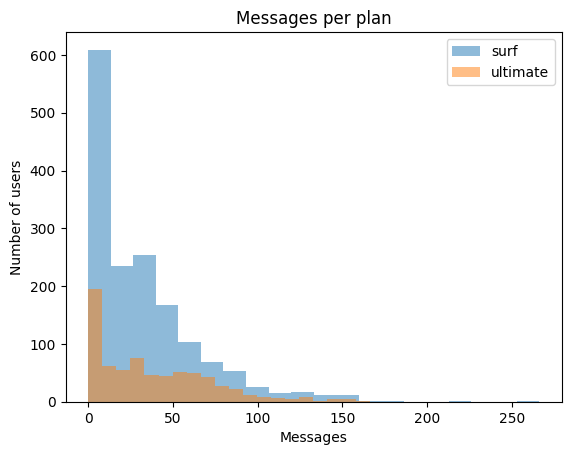

<Figure size 1000x1000 with 0 Axes>

In [47]:
# Compare the number of messages users of each plan tend to send each month
messages_surf= merged[merged['plan']=='surf']['message_date']
messages_ult= merged[merged['plan']=='ultimate']['message_date']
plt.hist(messages_surf,bins=20,alpha=.5,label= 'surf')
plt.hist(messages_ult,bins=20,alpha=.5,label='ultimate')
plt.xlabel('Messages')
plt.ylabel('Number of users')
plt.title('Messages per plan')
plt.legend()
plt.figure(figsize=(10,10))
plt.show()


In [48]:
mean_surf= merged[merged['plan']=='surf']['message_date'].mean()
mean_ultimate= merged[merged['plan']=='ultimate']['message_date'].mean()
var_surf=merged[merged['plan']=='surf']['message_date'].var()
var_ultimate=merged[merged['plan']=='ultimate']['message_date'].var()

print(f'The mean for the surf plan is: {mean_surf}')
print(f'The mean for the ultimate plan is: {mean_ultimate}')
print(f'The variance for the surf plan is: {var_surf}')
print(f'The variance for the ultimate plan is: {var_ultimate}')

The mean for the surf plan is: 31.15956770502225
The mean for the ultimate plan is: 37.55138888888889
The variance for the surf plan is: 1126.7245219504068
The variance for the ultimate plan is: 1208.7567435481378


Calculated the mean and the variance of the messages used to reason on whether users on the different plans have different behaviours for their messages. The mean amount for ultimate are a bit over with the ultimate plan having 37 on average compared to the surf plan averaging 31.The messages behaviors tend to be greater for the ultimate users compared to the surf plan users.

### Internet

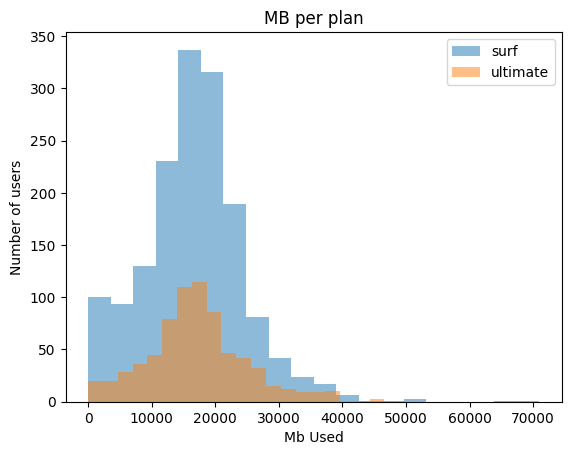

<Figure size 1000x1000 with 0 Axes>

In [49]:
# Compare the amount of internet traffic consumed by users per plan
internet_used_surf=merged[merged['plan']=='surf']['mb_used']
internet_used_ult=merged[merged['plan']=='ultimate']['mb_used']
plt.hist(internet_used_surf,bins=20,alpha=.5,label= 'surf')
plt.hist(internet_used_ult,bins=20,alpha=.5,label='ultimate')
plt.xlabel('Mb Used')
plt.ylabel('Number of users')
plt.title('MB per plan')
plt.legend()
plt.figure(figsize=(10,10))
plt.show()


Above is a histogram showing surf and ultimate users internet usages in mb.

In [50]:
mean_surf= merged[merged['plan']=='surf']['mb_used'].mean()
mean_ultimate= merged[merged['plan']=='ultimate']['mb_used'].mean()
var_surf=merged[merged['plan']=='surf']['mb_used'].var()
var_ultimate=merged[merged['plan']=='ultimate']['mb_used'].var()

print(f'The mean for the surf plan is: {mean_surf}')
print(f'The mean for the ultimate plan is: {mean_ultimate}')
print(f'The variance for the surf plan is: {var_surf}')
print(f'The variance for the ultimate plan is: {var_ultimate}')

The mean for the surf plan is: 16558.283490146216
The mean for the ultimate plan is: 17214.699694444444
The variance for the surf plan is: 64216395.838027954
The variance for the ultimate plan is: 61652293.32385832


Based on the calculations above, the ultimate plan users use more data on average compared to the surf users.

## Revenue

In [51]:
mean_surf= merged[merged['plan']=='surf']['month_total']
mean_ultimate= merged[merged['plan']=='ultimate']['month_total']
total_surf_revenue= merged[merged['plan']=='surf']['month_total'].sum()
total_ultimate_revenue= merged[merged['plan']=='ultimate']['month_total'].sum()
print(f'The total revenue for the surf plan is : {total_surf_revenue}')
print(f'The total revenue for the ultimate plan is : {total_ultimate_revenue}')
print(f'The mean for the surf plan is: {mean_surf.mean()}')
print(f'The median for the surf plan is: {mean_surf.median()}')
print(f'The standard deviation for the surf plan is: {mean_surf.std()}')
print(f'The variance for the surf plan is: {mean_surf.var()}')
print(f'The mean for the ultimate plan is: {mean_ultimate.mean()}')
print(f'The median for the ultimate plan is: {mean_ultimate.median()}')
print(f'The standard deviation for the ultimate plan is: {mean_ultimate.std()}')
print(f'The variance for the ultimate plan is: {mean_ultimate.var()}')

The total revenue for the surf plan is : 95491.18
The total revenue for the ultimate plan is : 52066.0
The mean for the surf plan is: 60.706408137317226
The median for the surf plan is: 40.36
The standard deviation for the surf plan is: 55.388041600095214
The variance for the surf plan is: 3067.835152293878
The mean for the ultimate plan is: 72.31388888888888
The median for the ultimate plan is: 70.0
The standard deviation for the ultimate plan is: 11.395107965742119
The variance for the ultimate plan is: 129.8484855509195


Above I calculate the mean, median, standard deviation, and variance for the surf/ultimate plans. On average, the ultiimate plan members bring in more revenue, with the mean at 72 compared to their surf counterparts coming in at around 60. the surf plan is responsible for the majority of teh revenue brought in.

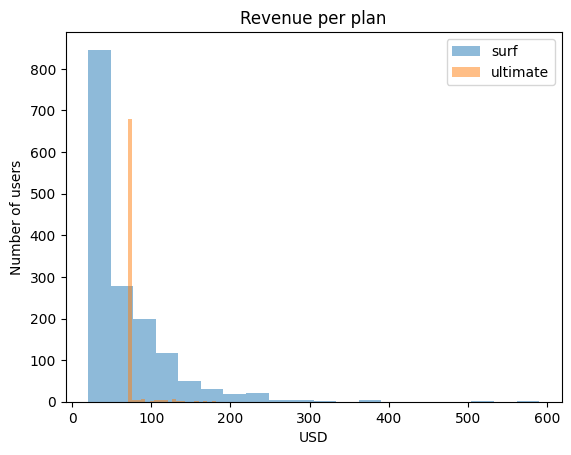

<Figure size 1000x1000 with 0 Axes>

In [52]:
plt.hist(mean_surf,bins=20,alpha=.5,label= 'surf')
plt.hist(mean_ultimate,bins=20,alpha=.5,label='ultimate')
plt.xlabel('USD')
plt.ylabel('Number of users')
plt.title('Revenue per plan')
plt.legend()
plt.figure(figsize=(10,10))
plt.show()

The histogram above shows the revenue based on the plans. since there are more surf users its seems as though they are bringing in the bulk of the revenue even though their average made per user is less.

## Test statistical hypotheses

Below I am testing the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs. The null hypothesis is that the average revenue is the same between plans and the alternative hypotheses means it is not diffrent. Did a statistical test, decideing the alpha value to be .05. Sinse the null hypothesis is rejected, it means the averages are diffrent.

In [53]:
# Test the hypotheses
alpha=.05
results=st.ttest_ind(mean_surf,mean_ultimate)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  2.862674510698644e-08
We reject the null hypothesis


Testing the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.Null hypothesis being NY-NJ area is the same as other regions. Did a statistical test, decideing on an alpha value of .05. Since the null hypothesis is rejected, the usage for the NY-NJ region is diffrent to the other regions.

In [54]:
# Test the hypotheses
NY_NJ=merged[merged['city'].str.contains('NY-NJ')]['month_total']
other=merged[~merged['city'].str.contains('NY-NJ')]['month_total']

alpha=.05
results=st.ttest_ind(NY_NJ,other)
print('p-value: ', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")


p-value:  0.04355743162134274
We reject the null hypothesis


## General conclusion

Based on the statistical analysis and graphs, it is easy to determine that the surf plan is responsible for bringing in more revenue. The ultimate plan brings in more revenue on average verses the surf plan but due to teh limited users the total revenue is less than the surf users.